# MLPClassifier

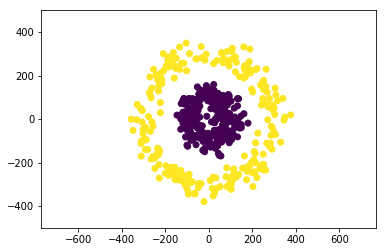

            x           y
0 -127.102663   71.391420
1 -153.309316  233.599522
2   12.069338  -12.790933
3  -98.371741  -38.212218
4 -235.452685  181.899506
   z
0  0
1  1
2  0
3  0
4  1
[[53  0]
 [ 0 47]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        53
          1       1.00      1.00      1.00        47

avg / total       1.00      1.00      1.00       100



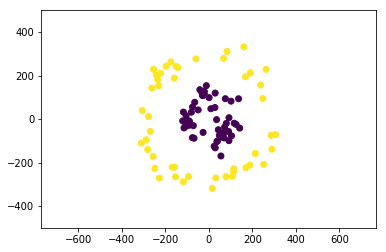

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  

# Generate the artificial data set and display the resulting scatter plot 

x = []
y = []
z = []
for i in range(500):
    rand = np.random.uniform(0.0, 2*math.pi)
    randx = np.random.normal(0.0, 30.0)
    randy = np.random.normal(0.0, 30.0)
    if np.random.random() > 0.5:
        z.append(0)
        x.append(100*math.cos(rand) + randx)
        y.append(100*math.sin(rand) + randy)
    else:
        z.append(1)
        x.append(300*math.cos(rand) + randx)
        y.append(300*math.sin(rand) + randy)

plt.axis('equal')
plt.axis([-500, 500, -500, 500])
plt.scatter(x, y, c=z)
plt.show()

# Run the MLPClassifier algorithm on the training data

XY = pd.DataFrame({'x': x, 'y': y})
print(XY.head())
Z = pd.DataFrame({'z': z})
print(Z.head())
XY_train, XY_test, Z_train, Z_test = train_test_split(XY, Z, test_size = 0.20)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(XY_train, Z_train.values.ravel())

# Make predictions on the test data and display resulting scatter plot

predictions = mlp.predict(XY_test)

print(confusion_matrix(Z_test,predictions))  
print(classification_report(Z_test,predictions))

plt.axis('equal')
plt.axis([-500, 500, -500, 500])
plt.scatter(XY_test.x, XY_test.y, c=predictions)
plt.show()